In [1]:
import nltk

In [2]:
from nltk.tokenize import sent_tokenize

In [3]:
text = """Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't it cardboard."""

In [4]:
tokenized_text = sent_tokenize(text)

In [5]:
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't it cardboard."]


In [6]:
from nltk.tokenize import word_tokenize

In [7]:
tokenized_word = word_tokenize(text)

In [8]:
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'it', 'cardboard', '.']


In [9]:
from nltk.probability import FreqDist

In [10]:
fdist = FreqDist(tokenized_word)

In [11]:
fdist.most_common(3)

[('is', 3), ('.', 3), (',', 2)]

In [12]:
import matplotlib.pyplot as plt

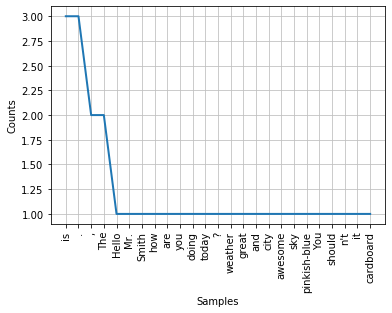

In [13]:
fdist.plot(31, cumulative=False)

In [14]:
len(tokenized_word)

31

In [15]:
from nltk.corpus import stopwords

In [16]:
stop_words = set(stopwords.words("english"))

In [17]:
print(stop_words)

{"isn't", 'so', 'being', 'ourselves', 'don', 'up', 'than', 'is', 'after', 'are', 'now', 'couldn', 'y', 'wasn', 'under', 'same', "you're", 'here', 'or', 'they', 'about', 'between', 'ma', 'he', 'for', 'hasn', 'will', 'yourselves', 'we', 'through', 'she', 'her', 'where', 'themselves', "hadn't", 'shouldn', 'few', 'myself', 'herself', 'doing', 'all', 'how', 't', 'haven', 'some', 'an', 'itself', 'whom', 'you', "it's", 'no', 's', 'doesn', 'our', 'its', 'with', 'll', 'hadn', 'weren', 'against', 'again', 'and', "needn't", 'there', 'each', "mightn't", 'shan', 'd', 'wouldn', 'a', 'yours', "couldn't", 'didn', 'o', 'that', "weren't", 'off', 'at', 'below', 'over', 'these', 'by', 'himself', 'did', 'into', "wouldn't", 'i', 'while', "didn't", 'am', 'have', 'on', 'mightn', 'ain', 'further', "you'll", 'what', 'only', 'can', 'been', 'most', 'm', "aren't", 'were', 'nor', 'was', 'be', 'more', 'to', 'theirs', 'does', "won't", 'this', 'me', 'him', "you'd", 'needn', 'which', 'during', 'should', 'who', 'because

In [18]:
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

In [19]:
print(filtered_sent)

['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'cardboard', '.']


In [20]:
from nltk.stem import PorterStemmer

In [21]:
ps = PorterStemmer()

In [22]:
stemmed_words = []
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

In [23]:
print(stemmed_words)

['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'cardboard', '.']


In [24]:
print(filtered_sent)

['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'cardboard', '.']


In [25]:
ps.stem('flying')

'fli'

In [27]:
ps.stem('fly')

'fli'

In [28]:
ps.stem('virus')

'viru'

In [29]:
ps.stem('connection')

'connect'

In [30]:
ps.stem('connected')

'connect'

In [31]:
from nltk.stem.wordnet import WordNetLemmatizer

In [32]:
lem = WordNetLemmatizer()

In [33]:
word = 'flying'
lem.lemmatize(word,'v')

'fly'

In [34]:
lem.lemmatize('better','a')

'good'

In [35]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [36]:
tokens = nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [37]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('train.tsv', sep='\t')

In [40]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [42]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [43]:
Sentiment_count = data.groupby('Sentiment').count()

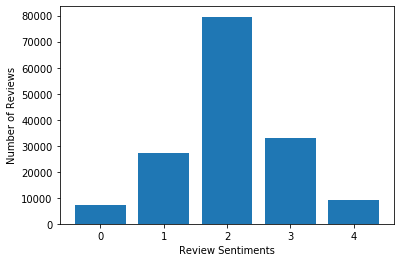

In [44]:
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Phrase'])

In [47]:
word = 'harish\tjoya'
print(word)

harish	joya


In [48]:
word = r'harish\tjoya'
print(word)

harish\tjoya


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.3, random_state = 10)

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [63]:
clf = MultinomialNB().fit(X_train, y_train)

In [64]:
pred = clf.predict(X_test)
print('MultinomialNB Accuracy:', metrics.accuracy_score(y_test, pred))

MultinomialNB Accuracy: 0.6066256567986672


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Phrase'])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size = 0.3, random_state = 42)

In [67]:
X_train.shape

(109242, 15240)

In [68]:
X_test.shape

(46818, 15240)

In [69]:
clf = MultinomialNB().fit(X_train, y_train)

In [70]:
pred = clf.predict(X_test)
print('MultinomialNB Accuracy:', metrics.accuracy_score(y_test, pred))

MultinomialNB Accuracy: 0.5815284719552309


In [71]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
